# Additional training functions

[`train`](/train.html#train) provides a number of extension methods that are added to [`Learner`](/basic_train.html#Learner) (see below for a list and details), along with three simple callbacks:

- [`ShowGraph`](/train.html#ShowGraph)
- [`GradientClipping`](/train.html#GradientClipping)
- [`BnFreeze`](/train.html#BnFreeze)

In [1]:
from fastai.gen_doc.nbdoc import *
from fastai.train import *
from fastai.vision import *
from fastai import *

## [`Learner`](/basic_train.html#Learner) extension methods

These methods are automatically added to all [`Learner`](/basic_train.html#Learner) objects created after importing this module. They provide convenient access to a number of callbacks, without requiring them to be manually created.

In [2]:
show_doc(fit_one_cycle)

<h4 id="fit_one_cycle"><code>fit_one_cycle</code><a href="https://github.com/fastai/fastai/blob/master/fastai/train.py#L12" class="source_link">[source]</a></h4>

> <code>fit_one_cycle</code>(`learn`:[`Learner`](/basic_train.html#Learner), `cyc_len`:`int`, `max_lr`:`Union`\[`float`, `Collection`\[`float`\], `slice`\]=`slice(None, 0.003, None)`, `moms`:`Point`=`(0.95, 0.85)`, `div_factor`:`float`=`25.0`, `pct_start`:`float`=`0.3`, `wd`:`float`=`None`, `callbacks`:`Optional`\[`Collection`\[[`Callback`](/callback.html#Callback)\]\]=`None`, `kwargs`)

Fit a model following the 1cycle policy.  

Fit a model with 1cycle training. See [`OneCycleScheduler`](/callbacks.one_cycle.html#OneCycleScheduler) for details.

In [3]:
show_doc(lr_find)

<h4 id="lr_find"><code>lr_find</code><a href="https://github.com/fastai/fastai/blob/master/fastai/train.py#L22" class="source_link">[source]</a></h4>

> <code>lr_find</code>(`learn`:[`Learner`](/basic_train.html#Learner), `start_lr`:`Floats`=`1e-07`, `end_lr`:`Floats`=`10`, `num_it`:`int`=`100`, `stop_div`:`bool`=`True`, `kwargs`:`Any`)

Explore lr from `start_lr` to `end_lr` over `num_it` iterations in `learn`. If `stop_div`, stops when loss explodes.  

See [`LRFinder`](/callbacks.lr_finder.html#LRFinder) for details.

In [4]:
show_doc(to_fp16)

<h4 id="to_fp16"><code>to_fp16</code><a href="https://github.com/fastai/fastai/blob/master/fastai/train.py#L30" class="source_link">[source]</a></h4>

> <code>to_fp16</code>(`learn`:[`Learner`](/basic_train.html#Learner), `loss_scale`:`float`=`512.0`, `flat_master`:`bool`=`False`) → [`Learner`](/basic_train.html#Learner)

Transform `learn` in FP16 precision.  

See [`MixedPrecision`](/callbacks.fp16.html#MixedPrecision) for details.

In [5]:
show_doc(mixup)

<h4 id="mixup"><code>mixup</code><a href="https://github.com/fastai/fastai/blob/master/fastai/train.py#L37" class="source_link">[source]</a></h4>

> <code>mixup</code>(`learn`:[`Learner`](/basic_train.html#Learner), `alpha`:`float`=`0.4`, `stack_x`:`bool`=`False`, `stack_y`:`bool`=`True`) → [`Learner`](/basic_train.html#Learner)

Add mixup https://arxiv.org/abs/1710.09412 to `learn`.  

See [`MixUpCallback`](/callbacks.mixup.html#MixUpCallback) for more details.

A last extension method comes from the module tta.

In [6]:
show_doc(Learner.TTA, full_name='TTA')

<h4 id="TTA"><code>TTA</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/tta.py#L32" class="source_link">[source]</a></h4>

> <code>TTA</code>(`learn`:[`Learner`](/basic_train.html#Learner), `beta`:`float`=`0.4`, `scale`:`float`=`1.35`, `ds_type`:[`DatasetType`](/basic_data.html#DatasetType)=`<DatasetType.Valid: 2>`, `with_loss`:`bool`=`False`) → `Tensors`

Applies Test Time Augmentation to `learn` on the dataset `ds_type`. We take the average of our regular predictions (with a weight `beta`) with the average of predictions obtained thourh augmented versions of the training set (with a weight `1-beta`). The transforms decided for the training set are applied with a few changes `scale` controls the scale for zoom (which isn't random), the cropping isn't random but we make sure to get the four corners of the image. Flipping isn't random but applied once on each of those corner images (so that makes 8 augmented versions total).

We'll show examples below using our MNIST sample.

In [7]:
path = untar_data(URLs.MNIST_SAMPLE)
data = ImageDataBunch.from_folder(path)

In [17]:
show_doc(ShowGraph)

<h2 id="ShowGraph"><code>class</code> <code>ShowGraph</code><a href="https://github.com/fastai/fastai/blob/master/fastai/train.py#L48" class="source_link">[source]</a></h2>

> <code>ShowGraph</code>(`learn`:[`Learner`](/basic_train.html#Learner)) :: [`LearnerCallback`](/basic_train.html#LearnerCallback)

Update a graph of learner stats and metrics after each epoch.  

epoch,train_loss,valid_loss,accuracy
1,0.069398,0.042775,0.985280


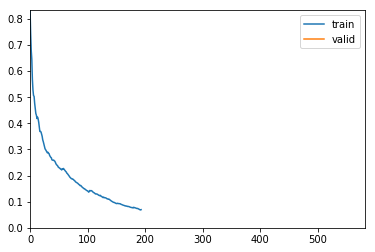

In [ ]:
learn = create_cnn(data, models.resnet18, metrics=accuracy, callback_fns=ShowGraph)
learn.fit(3)

```python
learn = create_cnn(data, models.resnet18, metrics=accuracy, callback_fns=ShowGraph)
learn.fit(3)
```

![Training graph](imgs/train_graph.gif)

In [9]:
show_doc(ShowGraph.on_epoch_end, doc_string=False)

<h4 id="ShowGraph.on_epoch_end"><code>on_epoch_end</code><a href="https://github.com/fastai/fastai/blob/master/fastai/train.py#L50" class="source_link">[source]</a></h4>

> <code>on_epoch_end</code>(`n_epochs`:`int`, `last_metrics`:`MetricsList`, `kwargs`) → `bool`

If we have `last_metrics`, plot them in `self.pbar`. Set the size of the graph with `n_epochs`.

In [10]:
show_doc(GradientClipping)

<h2 id="GradientClipping"><code>class</code> <code>GradientClipping</code><a href="https://github.com/fastai/fastai/blob/master/fastai/train.py#L68" class="source_link">[source]</a></h2>

> <code>GradientClipping</code>(`learn`:[`Learner`](/basic_train.html#Learner), `clip`:`float`) :: [`LearnerCallback`](/basic_train.html#LearnerCallback)

To do gradient clipping during training.  

Clips gradient at a maximum absolute value of `clip` during training. For instance:

In [11]:
learn = create_cnn(data, models.resnet18, metrics=accuracy,
    callback_fns=partial(GradientClipping, clip=0.1))
learn.fit(1)

Total time: 00:54
epoch  train_loss  valid_loss  accuracy
1      0.094744    0.041195    0.991168  (00:54)



In [12]:
show_doc(GradientClipping.on_backward_end, doc_string=False)

<h4 id="GradientClipping.on_backward_end"><code>on_backward_end</code><a href="https://github.com/fastai/fastai/blob/master/fastai/train.py#L72" class="source_link">[source]</a></h4>

> <code>on_backward_end</code>(`kwargs`)

Clip the gradients after they are computed but before the optimizer step.

In [13]:
show_doc(BnFreeze)

<h2 id="BnFreeze"><code>class</code> <code>BnFreeze</code><a href="https://github.com/fastai/fastai/blob/master/fastai/train.py#L61" class="source_link">[source]</a></h2>

> <code>BnFreeze</code>(`learn`:[`Learner`](/basic_train.html#Learner)) :: [`LearnerCallback`](/basic_train.html#LearnerCallback)

Freeze moving average statistics in all non-trainable batchnorm layers.  

For batchnorm layers where `requires_grad==False`, you generally don't want to update their moving average statistics, in order to avoid the model's statistics getting out of sync with its pre-trained weights. You can add this callback to automate this freezing of statistics (internally, it calls `eval` on these layers).

In [14]:
learn = create_cnn(data, models.resnet18, metrics=accuracy, callback_fns=BnFreeze)
learn.fit(1)

Total time: 00:48
epoch  train_loss  valid_loss  accuracy
1      0.075918    0.041582    0.985770  (00:48)



In [15]:
show_doc(BnFreeze.on_epoch_begin, doc_string=False)

<h4 id="BnFreeze.on_epoch_begin"><code>on_epoch_begin</code><a href="https://github.com/fastai/fastai/blob/master/fastai/train.py#L63" class="source_link">[source]</a></h4>

> <code>on_epoch_begin</code>(`kwargs`:`Any`)

Set back the batchnorm layers on `eval` mode after the model has been set to [`train`](/train.html#train).

## Undocumented Methods - Methods moved below this line will intentionally be hidden

In [16]:
show_doc(one_cycle_scheduler)

<h4 id="one_cycle_scheduler"><code>one_cycle_scheduler</code><a href="https://github.com/fastai/fastai/blob/master/fastai/train.py#L9" class="source_link">[source]</a></h4>

> <code>one_cycle_scheduler</code>(`lr_max`:`float`, `kwargs`:`Any`) → [`OneCycleScheduler`](/callbacks.one_cycle.html#OneCycleScheduler)